In [4]:
!curl https://download.mosek.com/stable/8.1.0.82/mosektoolslinux64x86.tar.bz2 --output /root/mosektoolslinux64x86.tar.bz2
!cd /root/; tar xvf /root/mosektoolslinux64x86.tar.bz2
from google.colab import drive
drive.mount('/content/gdrive')
!cp -avr /content/gdrive/My\ Drive/Mosek/mosek.lic /root/mosek/
!pip install git+https://github.com/convexengineering/gpkit
!pip show gpkit

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40.3M  100 40.3M    0     0  81.3M      0 --:--:-- --:--:-- --:--:-- 81.4M
mosek/8/tools/examples/python/parameters.py
mosek/8/toolbox/examples/cqo1.m
mosek/8/toolbox/r2014a/mskqpopt.m
mosek/8/tools/examples/fusion/java/breaksolver.java
mosek/8/toolbox/r2014a/mskcheck.m
mosek/8/tools/examples/fusion/cxx/lo1.cc
mosek/8/tools/examples/data/dgo.f
mosek/8/tools/examples/dotnet/scopt1.cs
mosek/8/tools/examples/dotnet/solvebasis.cs
mosek/8/toolbox/r2014aom/mskerrmsg.m
mosek/8/toolbox/examples/simple.m
mosek/8/tools/examples/java/solutionquality.java
mosek/8/tools/examples/fusion/dotnet/production.cs
mosek/8/tools/examples/fusion/java/Makefile
mosek/8/tools/examples/fusion/python/lo1.py
mosek/8/tools/examples/fusion/java/duality.java
mosek/8/tools/platform/linux64x86/bin/libcilkrts.so.5
mosek/8/toolbox/examples/qo2.m
mosek/8/tools/ex

In [5]:
'''
Minimizing delay:
'''
import numpy as np
from gpkit import Variable, VectorVariable, Model
from gpkit.nomials import Monomial, Posynomial, PosynomialInequality
import matplotlib.pyplot as plt

N = 6
Gsize = VectorVariable(N, "x")    #gate sizes as a vector
T0 = Variable("T0")               #T0 as a variable
g = [1,1,1,1,1,1]   #list of logical efforts of the gates in the path
p = [1,1,1,1,1,1]   #list of parasitic efforts of the gates in the path
m = 100             #output cap multiplicity factor
tau = 5             #intrinsic delay of the inverter

max_gate_size = 64
min_gate_size = 1

constraints = []

constraints.append(T0 >= (g[0] * Gsize[1] / Gsize[0]) + p[0] + \
                   (g[1] * Gsize[2] / Gsize[1]) + p[1] + \
                   (g[2] * Gsize[3] / Gsize[2]) + p[2] + \
                   (g[3] * Gsize[4] / Gsize[3]) + p[3] + \
                   (g[4] * Gsize[5] / Gsize[4]) + p[4] + \
                   (m / Gsize[5]) + p[5])

constraints.append(Gsize[0] == 1)         #setting size of 1st gate to 1x, to make sure that the sizes dont shootup and adhere gates behind 1st gate

for n in range(0,N):
  constraints.append(Gsize[n] >= min_gate_size)
  constraints.append(Gsize[n] <= max_gate_size)

objective = T0
model = Model(objective, constraints)
sol = model.solve(verbosity = 0)
Twall = sol["variables"]["T0"]
print("Twall = ",round(Twall,1))
print("Twall in ps = ",round(Twall*tau,1), "ps")
print("Sizes = ", list(sol["variables"]["x"]))



Found no installed solvers, beginning a build.
# Building GPkit version 1.1
# Moving to the directory from which GPkit was imported.

Attempting to find and build solvers:

# Looking for `mosek_cli`
#   (A "success" is if mskexpopt complains that
#    we haven't specified a file for it to open.)
#     Calling 'mskexpopt'
##
### CALL BEGINS
### CALL ENDS
##
# Looks like `mskexpopt` was not found in the default PATH,
#  so let's try locating that binary ourselves.
#   Adding /root/mosek/8/tools/platform/linux64x86/bin to the PATH
#     Calling 'mskexpopt'
##
### CALL BEGINS
### CALL ENDS
##

Found mosek_cli in /root/mosek/8/tools/platform/linux64x86/bin

# Looking for `mosek_conif`
#   Trying to import mosek...
# Did not find
# mosek_conif

# Looking for `cvxopt`
#   Trying to import cvxopt...


.


Found cvxopt in the default PYTHONPATH

Found the following solvers: mosek_cli, cvxopt
#     Replacing directory env


.........................E...................................................................................................................................../usr/local/lib/python3.11/dist-packages/gpkit/constraints/sgp.py:177: UserWarning: SGP not convergent: Cost rose by 0.0099% (9.99901e-31 to 1e-30) on GP solve 2. Details can be found in `m.program.results` or by solving at a higher verbosity. Note convergence is not guaranteed for models with SignomialEqualities.
  pywarnings.warn(
.................................................
ERROR: test_vector_sweep (gpkit.tests.t_sub.TestModelSubs.test_vector_sweep)
Test sweep involving VectorVariables
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gpkit/tests/t_sub.py", line 205, in test_vector_sweep
    sol = m.solve(verbosity=0)
          ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gpkit/constraints/prog_fa


GPkit is now installed with solver(s) ['mosek_cli', 'cvxopt']
To incorporate new solvers at a later date, run `gpkit.build()`.

If any tests didn't pass, please post the output above
(starting from "Found no installed solvers, beginning a build.")
to gpkit@mit.edu or https://github.com/convexengineering/gpkit/issues/new
so we can prevent others from having these errors.

The same goes for any other bugs you encounter with GPkit:
send 'em our way, along with any interesting models, speculative features,
comments, discussions, or clarifications you feel like sharing.

Finally, we hope you find our documentation (https://gpkit.readthedocs.io/)
and engineering-design models (https://github.com/convexengineering/gplibrary/)
to be useful resources for your own applications.

Enjoy!

Twall =  18.9
Twall in ps =  94.6 ps
Sizes =  [1.0, 2.154434766877665, 4.641590093049144, 9.999999070059587, 21.54433704754415, 46.41589661408925]


In [6]:
'''
Minimizing Area keeping constant delay:
'''

N = 6
Gsize = VectorVariable(N, "x")    #gate sizes as a vector?
T0 = Variable("T0")               #T0 as a variable
g = [1,1,1,1,1,1]   #list of logical efforts of the gates in the path
p = [1,1,1,1,1,1]   #list of parasitic efforts of the gates in the path
m = 100             #output cap multiplicity factor
tau = 5             #intrinsic delay of the inverter

max_gate_size = 64
min_gate_size = 1
T_spec = 1.2 * Twall

constraints = []

constraints.append(T0 >= (g[0] * Gsize[1] / Gsize[0]) + p[0] + \
                   (g[1] * Gsize[2] / Gsize[1]) + p[1] + \
                   (g[2] * Gsize[3] / Gsize[2]) + p[2] + \
                   (g[3] * Gsize[4] / Gsize[3]) + p[3] + \
                   (g[4] * Gsize[5] / Gsize[4]) + p[4] + \
                   (m / Gsize[5]) + p[5])

constraints.append(Gsize[0] == 1)         #setting size of 1st gate to 1x, to make sure that the sizes dont shootup and adhere gates behind 1st gate
constraints.append(T0 <= T_spec)

for n in range(0,N):
  constraints.append(Gsize[n] >= min_gate_size)
  constraints.append(Gsize[n] <= max_gate_size)

objective = np.sum(Gsize)
model = Model(objective, constraints)
sol = model.solve(verbosity = 0)
T_arrival = sol["variables"]["T0"]
print("T_arrival = ",round(T_arrival,1))
print("T_arrival in ps = ",round(T_arrival*tau,1), "ps")
print("Sizes = ", list(sol["variables"]["x"]))


T_arrival =  22.7
T_arrival in ps =  113.6 ps
Sizes =  [1.0, 1.0000002782850388, 1.1965547670131111, 1.869974136458512, 3.992701222650838, 13.404547298167696]


Solution check warning: Dual: sum of nu^T * A did not vanish.
[18.926612491494232, 20.819269997248536, 22.711945055862202, 24.604589731827524, 26.497251218279466, 28.389915668059515, 30.28259121378852, 32.17523315755532, 34.06791390077347, 35.960567827144125, 37.85321814821286, 39.74587253056564, 41.63853247624525, 43.53120337892339, 45.42388190999002, 47.31654391552221, 49.209170578449104, 51.10186532663104, 52.99449286787532, 54.88719066107811, 56.779821083956726, 58.67249218217101, 60.56517149193201, 62.45779196217024, 64.35045469599498, 66.2431458071957, 68.13581549894671, 70.02847884815118, 71.92112266821312, 73.81382170158925, 75.70642262687697, 77.59911325518671, 79.49181019987789, 81.38443186603791, 83.27713319308111, 85.1697224183922, 87.06239103786477, 88.95512241223939, 90.84774741651431, 92.74038218572973, 94.63307074410078, 96.52576813449866, 98.41842180486215, 100.31106420492817, 102.20371219936371, 104.09635910153365, 105.98907258740653, 107.88167233942943, 109.774361501

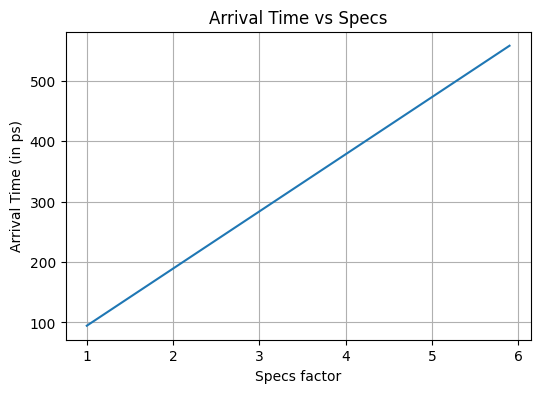

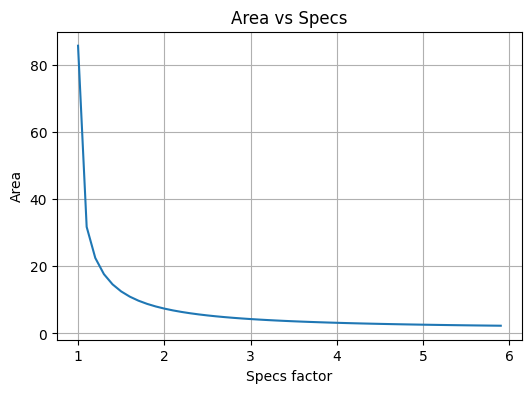

In [7]:
param_time = 50
spec = 0.9

arrival_times = []
area = []
spec_vec = []
for i in range(0,param_time):
  constraints = []
  constraints.append(T0 >= (g[0] * Gsize[1] / Gsize[0]) + p[0] + \
                   (g[1] * Gsize[2] / Gsize[1]) + p[1] + \
                   (g[2] * Gsize[3] / Gsize[2]) + p[2] + \
                   (g[3] * Gsize[4] / Gsize[3]) + p[3] + \
                   (g[4] * Gsize[5] / Gsize[4]) + p[4] + \
                   (m / Gsize[5]) + p[5])

  spec += 0.1
  spec_vec.append(spec)
  T_spec = spec * Twall
  constraints.append(Gsize[0] == 1)
  constraints.append(T0 <= T_spec)
  objective = np.sum(Gsize)
  model = Model(objective, constraints)
  sol = model.solve(verbosity = 0)
  T_arrival = sol["variables"]["T0"]
  arrival_times.append(T_arrival)
  area.append(np.sum(list(sol["variables"]["x"])))
  i += 1

print(arrival_times,area)
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
plt.plot(spec_vec, [x * tau for x in arrival_times])  # Multiply by tau for ps
plt.xlabel("Specs factor")
plt.ylabel("Arrival Time (in ps)")
plt.title("Arrival Time vs Specs")
plt.grid(True)
plt.show()

# Create the second plot for Area vs Specs
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
plt.plot(spec_vec, area)
plt.xlabel("Specs factor")
plt.ylabel("Area")
plt.title("Area vs Specs")
plt.grid(True)
plt.show()